## Final Project Submission

Please fill out:
* Student name: Cindy Minyade
* Student pace: Part-time 
* Instructor name: Brian Chacha

## SYRIATEL CUSTOMER CHURN PREDICTION

### 1. Business Understanding

SyriaTel is experiencing a loss of customers, which is referred to as 'churn'. This hurts the business as it takes more revenue to generate new customers, leading to loss of business revenue.
 
 ### 2. Business Goal

 The goal of this project is to develop a model that helps SyriaTel to predict which cutomers are liekly to churn using the historical data. [SyriaTel Customer Churn](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

By indentifying the potential churners early, SyriaTel is able to take action needed to ensure that they retain their clients. 

We will tackle the following in this project;
- Build multiple predictive models
- Evaluate and compare their preformance
- Explain model insights that will benefit the business



### 3. Data Understanding

We will begin by loading and exploring the data.

In [90]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#load the dataset
df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")

In [92]:
#basic overview of the dataset
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Now to farmiliarize with the data:  
- Understand the dimentions  
- Type of data it contains  
- If there's missing values  

In [93]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Interpretation of the data information
- Has 3,333 rows and 21 columns ; rows are the customers and columns are the customer features.
- The churn colum is the one of interest to this project in bool ie. True/False
- Data has no missing values
- `account length`: Duration of the customer relationship
- `international plan`, `voice mail plan`: Categorical service flags
- `total day minutes`, `total intl calls`, `customer service calls`: Customer Usage behavior
- `state`, and `phone number`: Likely not useful for prediction


### 4. Data Preparation

In this section we will prep the data for machine learning by:

- Dropping the irrelevant columns (`state`, `phone number`)
- Converting the categorical variables to numeric
- Separating the features and target variable
- Split data into training and testing sets

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Drop the irrelevant columns
df = df.drop(columns=['state', 'phone number'])

#convert 'churn' from boolean to numeric [0, 1]
df['churn'] = df['churn']. astype(int)

# Encode categorical variables; international plan, voice mail plan
categorical_cols = ['international plan', 'voice mail plan']
df[categorical_cols] = df[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))

#split features and target
X = df.drop('churn', axis=1) # input features used to predict churn
y = df['churn']    #target varible(churn) we are trying to predict

#split into training and testing sets ie 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scaling
Scaling ensures that the feature values need to be standardized through use if the standardscaler. 
In our SyriaTel churn model, some features have much larger ranges than others as follows:

- **total day minutes**: ~0–350  
- **total eve minutes**: ~0–350  
- **customer service calls**: 0–9  
- **international plan**, **voice mail plan**: 0 or 1 

Therefore we will need to standardize these values so that:

- **Mean = 0**  
- **Standard deviation = 1**  

To ensure that all features are in some sort of uniformity when the model is being trained.


In [95]:

from sklearn.preprocessing import StandardScaler


# Instantiate a scaler object
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

### 5. Modeling

We will build a model that can predict whether a customer will churn. We will use two models;
- Logistical Regression which is the baseline linear model
- Decision Tree Classifier which is the non-parametic model
Thereafter, we will evaluate the two models and recommend the better one

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#classification_report: gives precision, recall, f1-score
#confusion_matrix shows the number of churners/non-churners were correctly/incorrectly predicted

# initialize model
log_reg = LogisticRegression(max_iter=1000)

#modeling
log_reg.fit(X_train_scaled, y_train)

# prediction
y_pred_log_train = log_reg.predict(X_train_scaled)
y_pred_log_test = log_reg.predict(X_test_scaled)


print(classification_report(y_test, y_pred_log_test))
print(confusion_matrix(y_test, y_pred_log_test))

# The models accuracy is 0.86

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

[[554  12]
 [ 83  18]]


In [97]:
from sklearn.tree import DecisionTreeClassifier

churn_dt = DecisionTreeClassifier(random_state=42)

#fit
churn_dt.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=42)

In [98]:
# Predict
y_pred_dt_train = churn_dt.predict(X_train)
y_pred_dt_test = churn_dt.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_dt_test))
print(confusion_matrix(y_test, y_pred_dt_test))

# the accuracy is 0.92

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.73      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667

[[539  27]
 [ 27  74]]


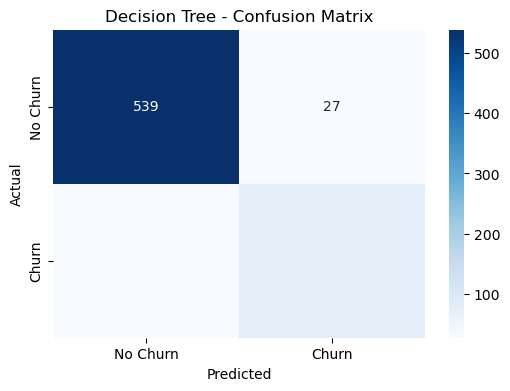

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions on test set
y_pred_dt_test = churn_dt.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


### 6. Evaluation
In this section, we will compare the two models `Logistic Regression` and `Decision Tree`.
We will use the key classification metric `recall` (class = 1)
In our case, recall is the percentage of actual churners that the model captured. Therefore this would be as below;
Recall = (TP) / (TP + FN)


| Metric                | Logistic Regression | Decision Tree |
| --------------------- | ------------------- | ------------- |
| Precision (Churn = 1) | 0.60                | **0.73**      |
| Recall (Churn = 1)    | 0.18                | **0.73**      |
| F1-Score (Churn = 1)  | 0.27                | **0.73**      |
| Accuracy              | 0.86                | **0.92**      |


In the above summary, the Decision Tree model outperforms the Logistic Regression. 
- The recall (0.73 vs 0.18), it was able to correctly capture 73% compared to the 18% by Logistic Regression.
- Accuracy is also higher in the Decision Tree model, showing it is the model that performs better.